Bo Yang (Aaron) USCID:7526922531

### INF 552 HOMEWORK_6  Date: 11-10-2019

## 1. Supervised, Semi-Supervised, and Unsupervised Learning

### (a) Download the Breast Cancer Wisconsin (Diagnostic) Data Set from: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+ %28Diagnostic%29. Download the data in https://archive.ics.uci.edu/ml/ machine-learning-databases/breast-cancer-wisconsin/wdbc.data, which has IDs, classes (Benign=B, Malignant=M), and 30 attributes. This data has two output classes. Use the first 20% of the positive and negative classes in the file as the test set and the rest as the training set.

In [1]:
ROOT_PATH = ".\\assets"
SPLASH = "\\"
WDBC_FILE_PATH = "wdbc.data"
BANK_NOTE_FILE_PATH = "data_banknote_authentication.txt"
M = 30

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

def load_data(file_path, X_startIndex=2, X_endIndex=None, y_index=1):
    row_data = pd.read_csv(file_path, encoding="utf-8", header=None)
    if X_endIndex == None:
        X_endIndex = row_data.shape[1]
    X = row_data.iloc[:, X_startIndex:X_endIndex]
    y = row_data.iloc[:, y_index]
    return X.to_numpy(), y.to_numpy()


def train_test_split_by_class_and_ratio(X, y, test_size=0.2, random_state=None, 
                                        pos_class='B', neg_class='M'):
    if random_state:
        np.random.seed(random_state)
        shuffled_indexes = np.random.permutation(len(X))
        X = X[shuffled_indexes]
        y = y[shuffled_indexes]

    positiveClassAmount = len(X[y == pos_class])
    negativeClassAmount = len(X[y == neg_class])
    positivetestSetLength = round(positiveClassAmount * test_size)
    negativetestSetLength = round(negativeClassAmount * test_size)

    X_test_B = X[y == pos_class][:positivetestSetLength]
    X_test_M = X[y == neg_class][:negativetestSetLength]
    X_test = np.concatenate((X_test_B, X_test_M), axis=0)

    X_train_B = X[y == pos_class][positivetestSetLength:]
    X_train_M = X[y == neg_class][negativetestSetLength:]
    X_train = np.concatenate((X_train_B, X_train_M), axis=0)

    y_test_B = y[y == pos_class][:positivetestSetLength]
    y_test_M = y[y == neg_class][:negativetestSetLength]
    y_test = np.concatenate((y_test_B, y_test_M), axis=0)

    y_train_B = y[y == pos_class][positivetestSetLength:]
    y_train_M = y[y == neg_class][negativetestSetLength:]
    y_train = np.concatenate((y_train_B, y_train_M), axis=0)

    return X_train, X_test, y_train, y_test

In [3]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                       test_size=0.2,
                                                                       random_state=2333)

print("-----------\"Row Data\"-------------")
print("the shape of X_data is: ", X_data.shape)
print("the shape of y_data is: ", y_data.shape)
print("-----------\"After Split\"-------------")
print("the shape of X_train is: ", X_train.shape)
print("the shape of X_test is: ", X_test.shape)
print("the shape of y_train is: ", y_train.shape)
print("the shape of y_test is: ", y_test.shape)

-----------"Row Data"-------------
the shape of X_data is:  (569, 30)
the shape of y_data is:  (569,)
-----------"After Split"-------------
the shape of X_train is:  (456, 30)
the shape of X_test is:  (113, 30)
the shape of y_train is:  (456,)
the shape of y_test is:  (113,)


### (b) Monte-Carlo Simulation: Repeat the following procedures for supervised, unsupervised, and semi-supervised learning M = 30 times, and use randomly selected train and test data (make sure you use 20% of both the positve and negative classes as the test set). Then compare the average scores (accuracy, precision, recall, F-score, and AUC) that you obtain from each algorithm. 

### i. Supervised Learning: Train an L1-penalized SVM to classify the data. Use 5 fold cross validation to choose the penalty parameter. Use normalized data. Report the average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

def plot_roc(y_true, y_predict, title="ROC"):
    falsePositiveRate, truePositiveRate, thresholds = roc_curve(y_true, y_predict)
    area = auc(falsePositiveRate, truePositiveRate)
    plt.plot(falsePositiveRate, truePositiveRate, color='red', label='AUC = ' + str(area))
    plt.plot([0, 1], [0, 1], linestyle='dotted')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend()
    plt.show()

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [02:24<00:00,  4.61s/it]


-----------"Training Confusion Matrix"-------------
Predicted    0    1  All
True                    
0          286    0  286
1            1  169  170
All        287  169  456
-----------"Training AVG Infos"-------------
AVG Accuracy Score:  0.9861842105263158
AVG Precision:  0.9835464510089077
AVG Recall Rate:  0.9946386946386947
AVG F1 -Score:  0.9890526587858675
AVG AUC:  0.9832997394762102


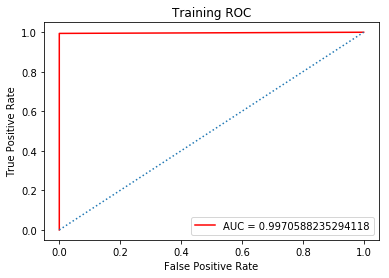

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          68   3   71
1           0  42   42
All        68  45  113
-----------"Testing AVG Infos"-------------
AVG Accuracy Score:  0.9672566371681415
AVG Precision:  0.9654438215182495
AVG Recall Rate:  0.9835680751173709
AVG F1 -Score:  0.9741965270948733
AVG AUC:  0.9616253073999553


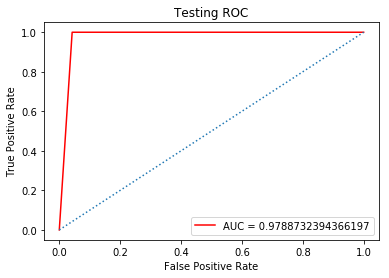

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import precision_recall_fscore_support as score, accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC
from tqdm import tqdm

X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)
parameters = {"C": np.linspace(1, 8, 10)}
trainAccuracyList = list()
trainPrecisionList = list()
trainRecallRateList = list()
trainF_scoreList = list()
trainAUCList = list()

testAccuracyList = list()
testPrecisionList = list()
testRecallRateList = list()
testF_scoreList = list()
testAUCList = list()
trainCrosstabList = dict()
testCrosstabList = dict()

y_trainList = dict()
y_testList = dict()
y_train_predictList = dict()
y_test_predictList = dict()
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0, 
                                                                           neg_class=1)
    y_trainList[i] = y_train
    y_testList[i] = y_test

    linSVC = LinearSVC(penalty="l1", dual=False, max_iter=5000)
    gridCV = GridSearchCV(linSVC, parameters, cv=5, n_jobs=-1)
    gridCV.fit(X_train, y_train)

    bestClf = gridCV.best_estimator_
    y_train_predict = bestClf.predict(X_train)
    y_test_predict = bestClf.predict(X_test)

    y_train_predictList[i] = y_train_predict
    y_test_predictList[i] = y_test_predict

    trainCrosstab = pd.crosstab(y_train, y_train_predict, rownames=['True'], 
                                colnames=['Predicted'], margins=True)
    trainCrosstabList[i] = trainCrosstab
    testCrosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], 
                               colnames=['Predicted'], margins=True)
    testCrosstabList[i] = testCrosstab

    trainPrecision, trainRecall, trainF_score, _ = score(y_train, y_train_predict, 
                                                         average='binary', pos_label=0)
    trainPrecisionList.append(trainPrecision)
    trainRecallRateList.append(trainRecall)
    trainF_scoreList.append(trainF_score)

    testPrecision, testRecall, testF_score, _ = score(y_test, y_test_predict, 
                                                      average='binary', pos_label=0)
    testPrecisionList.append(testPrecision)
    testRecallRateList.append(testRecall)
    testF_scoreList.append(testF_score)

    falsePositiveRate, truePositiveRate, _ = roc_curve(y_train, y_train_predict)
    trainAUC = auc(falsePositiveRate, truePositiveRate)
    trainAUCList.append(trainAUC)

    falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_test_predict)
    testAUC = auc(falsePositiveRate, truePositiveRate)
    testAUCList.append(testAUC)

    trainAccuracyList.append(accuracy_score(y_train, y_train_predict))
    testAccuracyList.append(accuracy_score(y_test, y_test_predict))

indexOfbBestPrecision = np.argmax(trainPrecisionList)
print("-----------\"Training Confusion Matrix\"-------------")
print(trainCrosstabList[indexOfbBestPrecision])
print("-----------\"Training AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(trainAccuracyList))
print("AVG Precision: ", np.average(trainPrecisionList))
print("AVG Recall Rate: ", np.average(trainRecallRateList))
print("AVG F1 -Score: ", np.average(trainF_scoreList))
print("AVG AUC: ", np.average(trainAUCList))
supTrainDF = pd.DataFrame(data={'Algorithm': ['Supervised Train']})
supTrainDF['AVG Accuracy'] = np.average(trainPrecisionList)
supTrainDF['AVG Precision'] = np.average(trainPrecisionList)
supTrainDF['AVG Recall'] = np.average(trainRecallRateList)
supTrainDF['AVG F Score'] = np.average(trainF_scoreList)
supTrainDF['AVG AUC'] = np.average(trainAUCList)
infoDF = pd.DataFrame().append(supTrainDF)
plot_roc(y_trainList[indexOfbBestPrecision], 
         y_train_predictList[indexOfbBestPrecision], title="Training ROC")

indexOfbBestPrecision = np.argmax(testPrecisionList)
print("-----------\"Testing Confusion Matrix\"-------------")
print(testCrosstabList[indexOfbBestPrecision])
print("-----------\"Testing AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(testAccuracyList))
print("AVG Precision: ", np.average(testPrecisionList))
print("AVG Recall Rate: ", np.average(testRecallRateList))
print("AVG F1 -Score: ", np.average(testF_scoreList))
print("AVG AUC: ", np.average(testAUCList))
supTestDF = pd.DataFrame(data={'Algorithm': ['Supervised Test']})
supTestDF['AVG Accuracy'] = np.average(testAccuracyList)
supTestDF['AVG Precision'] = np.average(testPrecisionList)
supTestDF['AVG Recall'] = np.average(testRecallRateList)
supTestDF['AVG F Score'] = np.average(testF_scoreList)
supTestDF['AVG AUC'] = np.average(testAUCList)

infoDF = infoDF.append(supTestDF)
plot_roc(y_testList[indexOfbBestPrecision], 
         y_test_predictList[indexOfbBestPrecision], title="Testing ROC")

### ii. Semi-Supervised Learning/ Self-training: select 50% of the positive class along with 50% of the negative class in the training set as labeled data and the rest as unlabelled data. You can select them randomly

#### A. Train an L1-penalized SVM to classify the labeled data Use normalized data. Choose the penalty parameter using 5 fold cross validation.

In [6]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)
X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                       test_size=0.2,
                                                                       random_state=2333, 
                                                                       pos_class=0, 
                                                                       neg_class=1)

labeled_X, unlabeled_X, labeled_y, expert = train_test_split_by_class_and_ratio(X_train, 
                                                                                y_train, 
                                                                                test_size=0.5,
                                                                                random_state=666, 
                                                                                pos_class=0,
                                                                                neg_class=1)
parameters = {"C": np.linspace(0.01, 2, 10)}

gridCV = GridSearchCV(LinearSVC(penalty="l1", dual=False, max_iter=10000), 
                      parameters, cv=5, n_jobs=-1)
gridCV.fit(labeled_X, labeled_y)

print("The test score  is:", gridCV.score(X_test, y_test))

print("The best penalty parameter C is: ", gridCV.best_params_)

The test score  is: 0.9734513274336283
The best penalty parameter C is:  {'C': 1.557777777777778}


#### B. Find the unlabeled data point that is the farthest to the decision boundary of the SVM. Let the SVM label it (ignore its true label), and add it to the labeled data, and retrain the SVM. Continue this process until all unlabeled data are used. Test the final SVM on the test data andthe average accuracy, precision, recall, F-score, and AUC, for both training and test sets over your M runs. Plot the ROC and report the confusion matrix for training and testing in one of the runs.

In [7]:
def fit_semi_learning_model(X_train, y_train, X_test, clf):
    X_test_shape = X_test.shape[0]
    for _ in range(X_test_shape):
        absDist = np.absolute(bestClf.decision_function(X_test))
        indexOfMaxDist = np.argmax(absDist)
        farthestDataPoint = np.array(X_test[indexOfMaxDist]).reshape(1, 30)
        predictedResult = clf.predict(farthestDataPoint)

        X_test = np.delete(X_test, indexOfMaxDist, axis=0)
        X_train = np.append(X_train, farthestDataPoint, axis=0)
        y_train = np.append(y_train, predictedResult, axis=0)

        clf.fit(X_train, y_train)

    return clf

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [05:09<00:00,  9.31s/it]


-----------"Training Confusion Matrix"-------------
Predicted    0   1  All
True                   
0          142   1  143
1            0  85   85
All        142  86  228
-----------"Training AVG Infos"-------------
AVG Accuracy Score:  0.9837719298245613
AVG Precision:  0.9781182045913979
AVG Recall Rate:  0.9965034965034965
AVG F1 -Score:  0.9872025509905846
AVG AUC:  0.9794282188399835


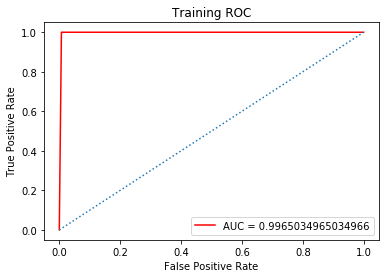

-----------"Testing Confusion Matrix"-------------
Predicted   0   1  All
True                  
0          68   3   71
1           0  42   42
All        68  45  113
-----------"Testing AVG Infos"-------------
AVG Accuracy Score:  0.9743362831858409
AVG Precision:  0.971327227313262
AVG Recall Rate:  0.9887323943661973
AVG F1 -Score:  0.9798173386259954
AVG AUC:  0.9693661971830986


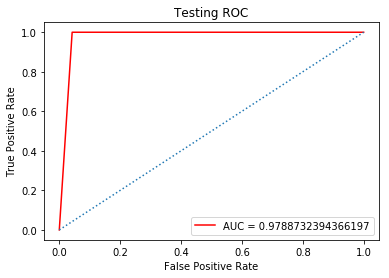

In [8]:
warnings.filterwarnings("ignore")

X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)
X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                       test_size=0.2,
                                                                       random_state=2333, 
                                                                       pos_class=0, 
                                                                       neg_class=1)


parameters = {"C": np.linspace(1, 5, 10)}

trainAccuracyList = list()
trainPrecisionList = list()
trainRecallRateList = list()
trainF_scoreList = list()
trainAUCList = list()

testAccuracyList = list()
testPrecisionList = list()
testRecallRateList = list()
testF_scoreList = list()
testAUCList = list()
trainCrosstabList = dict()
testCrosstabList = dict()
y_trainList = dict()
y_testList = dict()
y_train_predictList = dict()
y_test_predictList = dict()
y_train_trueList = dict()
for i in tqdm(range(M)):
    labeled_X, unlabeled_X, labeled_y, expert = train_test_split_by_class_and_ratio(X_train, 
                                                                                    y_train, 
                                                                                    test_size=0.5,
                                                                                    random_state=i, 
                                                                                    pos_class=0,
                                                                                    neg_class=1)
    gridCV = GridSearchCV(LinearSVC(penalty="l1", dual=False, max_iter=5000), 
                          parameters, cv=5, n_jobs=-1)
    gridCV.fit(labeled_X, labeled_y)
    bestClf = gridCV.best_estimator_

    bestClf = fit_semi_learning_model(labeled_X.copy(), labeled_y.copy(), 
                                      unlabeled_X.copy(), bestClf)

    y_train_predict = bestClf.predict(labeled_X)
    y_test_predict = bestClf.predict(X_test)

    y_train_predictList[i] = y_train_predict
    y_test_predictList[i] = y_test_predict
    y_train_trueList[i] = labeled_y

    trainCrosstab = pd.crosstab(labeled_y, y_train_predict, rownames=['True'], 
                                colnames=['Predicted'], margins=True)
    
    trainCrosstabList[i] = trainCrosstab
    
    testCrosstab = pd.crosstab(y_test, y_test_predict, rownames=['True'], 
                               colnames=['Predicted'], margins=True)
    testCrosstabList[i] = testCrosstab

    trainAccuracyList.append(accuracy_score(labeled_y, y_train_predict))
    testAccuracyList.append(accuracy_score(y_test, y_test_predict))

    trainPrecision, trainRecall, trainF_score, _ = score(labeled_y, y_train_predict, 
                                                         average='binary', pos_label=0)
    trainPrecisionList.append(trainPrecision)
    trainRecallRateList.append(trainRecall)
    trainF_scoreList.append(trainF_score)

    testPrecision, testRecall, testF_score, _ = score(y_test, y_test_predict, 
                                                      average='binary', pos_label=0)
    testPrecisionList.append(testPrecision)
    testRecallRateList.append(testRecall)
    testF_scoreList.append(testF_score)

    falsePositiveRate, truePositiveRate, _ = roc_curve(labeled_y, y_train_predict)
    trainAUC = auc(falsePositiveRate, truePositiveRate)
    trainAUCList.append(trainAUC)

    falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_test_predict)
    testAUC = auc(falsePositiveRate, truePositiveRate)
    testAUCList.append(testAUC)

indexOfbBestPrecision = np.argmax(trainPrecisionList)
print("-----------\"Training Confusion Matrix\"-------------")
print(trainCrosstabList[indexOfbBestPrecision])
print("-----------\"Training AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(trainAccuracyList))
print("AVG Precision: ", np.average(trainPrecisionList))
print("AVG Recall Rate: ", np.average(trainRecallRateList))
print("AVG F1 -Score: ", np.average(trainF_scoreList))
print("AVG AUC: ", np.average(trainAUCList))
semiTrainDF = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Train']})
semiTrainDF['AVG Accuracy'] = np.average(trainAccuracyList)
semiTrainDF['AVG Precision'] = np.average(trainPrecisionList)
semiTrainDF['AVG Recall'] = np.average(trainRecallRateList)
semiTrainDF['AVG F Score'] = np.average(trainF_scoreList)
semiTrainDF['AVG AUC'] = np.average(trainAUCList)
infoDF = infoDF.append(semiTrainDF)
plot_roc(y_train_trueList[indexOfbBestPrecision], 
         y_train_predictList[indexOfbBestPrecision], title="Training ROC")

indexOfbBestPrecision = np.argmax(testPrecisionList)
print("-----------\"Testing Confusion Matrix\"-------------")
print(testCrosstabList[indexOfbBestPrecision])
print("-----------\"Testing AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(testAccuracyList))
print("AVG Precision: ", np.average(testPrecisionList))
print("AVG Recall Rate: ", np.average(testRecallRateList))
print("AVG F1 -Score: ", np.average(testF_scoreList))
print("AVG AUC: ", np.average(testAUCList))
semiTestDF = pd.DataFrame(data={'Algorithm': ['Semi-Supervised Test']})
semiTestDF['AVG Accuracy'] = np.average(testAccuracyList)
semiTestDF['AVG Precision'] = np.average(testPrecisionList)
semiTestDF['AVG Recall'] = np.average(testRecallRateList)
semiTestDF['AVG F Score'] = np.average(testF_scoreList)
semiTestDF['AVG AUC'] = np.average(testAUCList)
infoDF = infoDF.append(semiTestDF)
plot_roc(y_test, y_test_predictList[indexOfbBestPrecision], title="Testing ROC")

### iii. Unsupervised Learning: Run k-means algorithm on the whole training set. Ignore the labels of the data, and assume k = 2.

### A. Run the k-means algorithm multiple times. Make sure that you initialize the algoritm randomly. How do you make sure that the algorithm was not trapped in a local minimum?

In [9]:
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)

precisionList = list()
recallRateList = list()
f_scoreList = list()
accuracyList = list()
aucList = list()
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0, 
                                                                           neg_class=1)
    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_train)
    precision, recall, f_score, _ = score(y_train, cluster_labels, 
                                          average='binary', pos_label=0)
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    accuracyList.append(accuracy_score(y_train, cluster_labels))
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_train, cluster_labels)
    aucList.append(auc(falsePositiveRate, truePositiveRate))

print("-----------\"STD Infos\"-------------")
print("MAX Accuracy Score: ", max(accuracyList))
print("MAX Precision: ", max(precisionList))
print("MAX Recall Rate: ", max(recallRateList))
print("MAX F1 -Score: ", max(f_scoreList))
print("MAX AUC: ", max(aucList))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 31.01it/s]


-----------"STD Infos"-------------
MAX Accuracy Score:  0.9429824561403509
MAX Precision:  0.9238410596026491
MAX Recall Rate:  0.9965034965034965
MAX F1 -Score:  0.9563758389261745
MAX AUC:  0.9247223364870424


#### Answers: The way to avoid get local minimum is to set the random seed and also try to run algorithm multiple times.

### B. Compute the centers of the two clusters and find the closest 30 data points to each center. Read the true labels of those 30 data points and take a majority poll within them. The majority poll becomes the label predicted by k-means for the members of each cluster. Then compare the labels provided by k-means with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:01<00:00, 29.52it/s]


-----------"Overall AVG Infos"-------------
AVG Accuracy Score:  0.9279970760233921
AVG Precision:  0.9146760083333317
AVG Recall Rate:  0.9763403263403264
AVG F1 -Score:  0.9444654037764288
AVG AUC:  0.9115034965034966


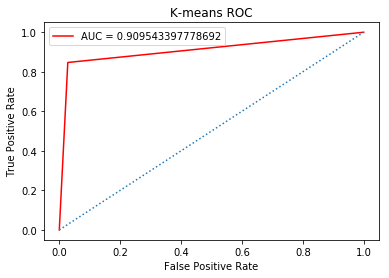

-----------"Confusion Matrix about One Run"-------------
Predicted    0    1  All
True                    
0          278    8  286
1           26  144  170
All        304  152  456


In [10]:
from collections import Counter

X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)

precisionList = list()
recallRateList = list()
f_scoreList = list()
aucList = list()
accuracyList = list()
y_predict = None
y_true = None
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0,
                                                                           neg_class=1)
    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_train)
    indexOfPosDist = np.argsort(cdist(X_train, k_means_clf.cluster_centers_, 
                                      'euclidean')[:, 0], axis=0)[:30]
    indexOfNegDist = np.argsort(cdist(X_train, k_means_clf.cluster_centers_, 
                                      'euclidean')[:, 1], axis=0)[:30]

    y_train_pos_nearest_30 = y_train[indexOfPosDist]
    y_train_neg_nearest_30 = y_train[indexOfNegDist]
    pos_label = Counter(y_train_pos_nearest_30).most_common(1)[0][0]
    neg_label = Counter(y_train_neg_nearest_30).most_common(1)[0][0]
    
    majorityPolling = np.vectorize(lambda x: pos_label if x == 0 else neg_label)
    new_cluster_labels = majorityPolling(cluster_labels)
    y_predict = new_cluster_labels
    y_true = y_train
    precision, recall, f_score, _ = score(y_train, y_predict, average='binary', pos_label=0)
    accuracyList.append(accuracy_score(y_train, y_predict))
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_train, y_predict)
    aucList.append(auc(falsePositiveRate, truePositiveRate))

print("-----------\"Overall AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(accuracyList))
print("AVG Precision: ", np.average(precisionList))
print("AVG Recall Rate: ", np.average(recallRateList))
print("AVG F1 -Score: ", np.average(f_scoreList))
print("AVG AUC: ", np.average(aucList))
unSupTrainDF = pd.DataFrame(data={'Algorithm': ['UnSupervised Train']})
unSupTrainDF['AVG Accuracy'] = np.average(accuracyList)
unSupTrainDF['AVG Precision'] = np.average(precisionList)
unSupTrainDF['AVG Recall'] = np.average(recallRateList)
unSupTrainDF['AVG F Score'] = np.average(f_scoreList)
unSupTrainDF['AVG AUC'] = np.average(aucList)
infoDF = infoDF.append(unSupTrainDF)
plot_roc(y_true, y_predict, title="K-means ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_true, y_predict, rownames=['True'], colnames=['Predicted'], margins=True))

### C. Classify test data based on their proximity to the centers of the clusters.Report the average accuracy, precision, recall, F-score, and AUC over M  runs, and ROC and the confusion matrix for one of the runs for the test data.

In [11]:
def checkResult(labels):
    majorityPredClass = Counter(labels).most_common(1)[0][0]
    if majorityPredClass != 0:
        flip = np.vectorize(lambda x: 1 if x == 0 else 0)
        return flip(labels).tolist()
    return labels

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 42.52it/s]


-----------"Overall AVG Infos"-------------
AVG Accuracy Score:  0.924778761061947
AVG Precision:  0.9163324961320425
AVG Recall Rate:  0.9699530516431925
AVG F1 -Score:  0.941946901188207
AVG AUC:  0.9091828750279453


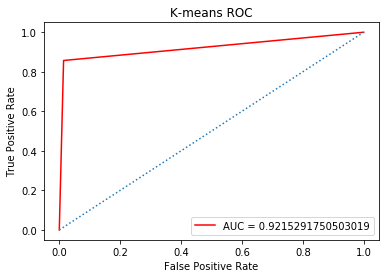

-----------"Confusion Matrix about One Run"-------------
Predicted   0   1  All
True                  
0          70   1   71
1           6  36   42
All        76  37  113


In [12]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)

precisionList = list()
recallRateList = list()
f_scoreList = list()
aucList = list()
y_test_predict = list()
accuracyList = list()
y_test_true = None
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0,
                                                                           neg_class=1)

    k_means_clf = KMeans(n_clusters=2, init='random', n_init=10)
    cluster_labels = k_means_clf.fit_predict(X_test)
    posDist = cdist(X_test, k_means_clf.cluster_centers_, 'euclidean')[:, 0]
    negDist = cdist(X_test, k_means_clf.cluster_centers_, 'euclidean')[:, 1]
    y_test_predict.clear()
    for index, pred_label in enumerate(cluster_labels):
        if pred_label == 0:
            y_test_predict.append(0 if abs(posDist[index]) < abs(negDist[index]) else 1)
        else:
            y_test_predict.append(1 if abs(posDist[index]) > abs(negDist[index]) else 0)

    y_test_predict = checkResult(y_test_predict)
    y_test_true = y_test
    precision, recall, f_score, _ = score(y_test, y_test_predict, average='binary', pos_label=0)
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_test, y_test_predict)
    aucList.append(auc(falsePositiveRate, truePositiveRate))
    accuracyList.append(accuracy_score(y_test, y_test_predict))

print("-----------\"Overall AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(accuracyList))
print("AVG Precision: ", np.average(precisionList))
print("AVG Recall Rate: ", np.average(recallRateList))
print("AVG F1 -Score: ", np.average(f_scoreList))
print("AVG AUC: ", np.average(aucList))
unSupTestDF = pd.DataFrame(data={'Algorithm': ['UnSupervised Test']})
unSupTestDF['AVG Accuracy'] = np.average(accuracyList)
unSupTestDF['AVG Precision'] = np.average(precisionList)
unSupTestDF['AVG Recall'] = np.average(recallRateList)
unSupTestDF['AVG F Score'] = np.average(f_scoreList)
unSupTestDF['AVG AUC'] = np.average(aucList)
infoDF = infoDF.append(unSupTestDF)

plot_roc(y_test_true, y_test_predict, title="K-means ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_test_true, np.reshape(y_test_predict, (-1,)), 
                  rownames=['True'], colnames=['Predicted'], margins=True))

### iv. Spectral Clustering: Repeat 1(b)iii using spectral clustering, which is clustering based on kernels. Research what spectral clustering is. Use RBF kernel with gamma=1 or find a gamma for which the two clutsres have the same balance as the one in original data set (if the positive class has p and the negative class has n samples, the two clusters must have p and n members). Do not label data based on their proximity to cluster center, because spectral clustering may give you non-convex clusters . Instead, use fit_predict method.

#### A. Run the Spectral Clustering algorithm multiple times. Make sure that you initialize the algoritm randomly。

In [13]:
from sklearn.cluster import SpectralClustering

X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)

precisionList = list()
recallRateList = list()
f_scoreList = list()
accuracyList = list()
aucList = list()
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0, 
                                                                           neg_class=1)
    
    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_train)
    accuracyList.append(accuracy_score(y_train, cluster_labels))
    precision, recall, f_score, _ = score(y_train, cluster_labels, 
                                          average='binary', pos_label=0)
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_train, cluster_labels)
    aucList.append(auc(falsePositiveRate, truePositiveRate))

print("-----------\"STD Infos\"-------------")
print("MAX Accuracy Score: ", max(accuracyList))
print("MAX Precision: ", max(precisionList))
print("MAX Recall Rate: ", max(recallRateList))
print("MAX F1 -Score: ", max(f_scoreList))
print("MAX AUC: ", max(aucList))

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 14.88it/s]


-----------"STD Infos"-------------
MAX Accuracy Score:  0.875
MAX Precision:  0.8377581120943953
MAX Recall Rate:  1.0
MAX F1 -Score:  0.9087999999999999
MAX AUC:  0.8347387906211436


#### B.The majority poll becomes the label predicted by Spectral Clustering for the members of each cluster. Then compare the labels provided by Spectral Clustering with the true labels of the training data and report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:02<00:00, 14.45it/s]


-----------"Overall AVG Infos"-------------
AVG Accuracy Score:  0.8601608187134502
AVG Precision:  0.821966038002112
AVG Recall Rate:  0.9926573426573427
AVG F1 -Score:  0.8991624086870043
AVG AUC:  0.8149561223090633


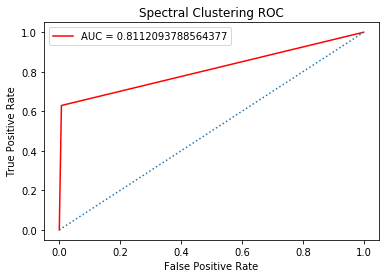

-----------"Confusion Matrix about One Run"-------------
Predicted    0    1  All
True                    
0          284    2  286
1           63  107  170
All        347  109  456


In [14]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)


accuracyList = list()
precisionList = list()
recallRateList = list()
f_scoreList = list()
aucList = list()
y_train_predict = None
y_train_true = None
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0,
                                                                           neg_class=1)

    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_train)

    indexOfPosDist = np.argwhere(cluster_labels == 0).reshape(-1, )
    indexOfNegDist = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_train_pos = y_train[indexOfPosDist]
    y_train_neg = y_train[indexOfNegDist]
    pos_label = Counter(y_train_pos).most_common(1)[0][0]
    neg_label = Counter(y_train_neg).most_common(1)[0][0]
    cluster_labels[indexOfPosDist] = pos_label
    cluster_labels[indexOfNegDist] = neg_label

    y_train_predict = cluster_labels
    y_train_true = y_train
    precision, recall, f_score, _ = score(y_train_true, y_train_predict, 
                                          average='binary', pos_label=0)
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_train_true, y_train_predict)
    aucList.append(auc(falsePositiveRate, truePositiveRate))
    accuracyList.append(accuracy_score(y_train_true, y_train_predict))

print("-----------\"Overall AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(accuracyList))
print("AVG Precision: ", np.average(precisionList))
print("AVG Recall Rate: ", np.average(recallRateList))
print("AVG F1 -Score: ", np.average(f_scoreList))
print("AVG AUC: ", np.average(aucList))
spectralTrainDF = pd.DataFrame(data={'Algorithm': ['Spectral Clustering Train']})
spectralTrainDF['AVG Accuracy'] = np.average(accuracyList)
spectralTrainDF['AVG Precision'] = np.average(precisionList)
spectralTrainDF['AVG Recall'] = np.average(recallRateList)
spectralTrainDF['AVG F Score'] = np.average(f_scoreList)
spectralTrainDF['AVG AUC'] = np.average(aucList)
infoDF = infoDF.append(spectralTrainDF)
plot_roc(y_train_true, y_train_predict, title="Spectral Clustering ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_train_true, y_train_predict, 
                  rownames=['True'], colnames=['Predicted'], margins=True))

#### C.Classify test data based on their proximity to the centers of the clusters. Report the average accuracy, precision, recall, F-score, and AUC over M runs, and ROC and the confusion matrix for one of the runs for the test data.

100%|██████████████████████████████████████████████████████████████████████████████████| 30/30 [00:00<00:00, 30.08it/s]


-----------"Overall AVG Infos"-------------
AVG Accuracy Score:  0.8510324483775811
AVG Precision:  0.8194824809524188
AVG Recall Rate:  0.9892018779342725
AVG F1 -Score:  0.8947321010582346
AVG AUC:  0.803331097697295


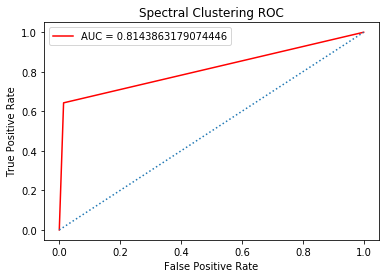

-----------"Confusion Matrix about One Run"-------------
Predicted   0   1  All
True                  
0          70   1   71
1          15  27   42
All        85  28  113


In [15]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + WDBC_FILE_PATH)
X_data = MinMaxScaler().fit(X_data).transform(X_data)
labelEncoder = LabelEncoder().fit(['B', 'M'])
y_data = labelEncoder.transform(y_data)

accuracyList = list()
precisionList = list()
recallRateList = list()
f_scoreList = list()
aucList = list()
y_test_predict = None
y_test_true = None
for i in tqdm(range(M)):
    X_train, X_test, y_train, y_test = train_test_split_by_class_and_ratio(X_data, y_data, 
                                                                           test_size=0.2,
                                                                           random_state=i, 
                                                                           pos_class=0,
                                                                           neg_class=1)
    
    spectral_clf = SpectralClustering(n_clusters=2, affinity="rbf", n_init=10, gamma=1)
    cluster_labels = spectral_clf.fit_predict(X_test)

    indexOfPosDist = np.argwhere(cluster_labels == 0).reshape(-1, )
    indexOfNegDist = np.argwhere(cluster_labels == 1).reshape(-1, )

    y_test_pos = y_test[indexOfPosDist]
    y_test_neg = y_test[indexOfNegDist]
    pos_label = Counter(y_test_pos).most_common(1)[0][0]
    neg_label = Counter(y_test_neg).most_common(1)[0][0]
    cluster_labels[indexOfPosDist] = pos_label
    cluster_labels[indexOfNegDist] = neg_label

    y_test_predict = cluster_labels
    y_test_true = y_test
    precision, recall, f_score, _ = score(y_test_true, y_test_predict, 
                                          average='binary', pos_label=0)
    precisionList.append(precision)
    recallRateList.append(recall)
    f_scoreList.append(f_score)
    falsePositiveRate, truePositiveRate, _ = roc_curve(y_test_true, y_test_predict)
    aucList.append(auc(falsePositiveRate, truePositiveRate))
    accuracyList.append(accuracy_score(y_test_true, y_test_predict))

print("-----------\"Overall AVG Infos\"-------------")
print("AVG Accuracy Score: ", np.average(accuracyList))
print("AVG Precision: ", np.average(precisionList))
print("AVG Recall Rate: ", np.average(recallRateList))
print("AVG F1 -Score: ", np.average(f_scoreList))
print("AVG AUC: ", np.average(aucList))
spectralTestDF = pd.DataFrame(data={'Algorithm': ['Spectral Clustering Test']})
spectralTestDF['AVG Accuracy'] = np.average(accuracyList)
spectralTestDF['AVG Precision'] = np.average(precisionList)
spectralTestDF['AVG Recall'] = np.average(recallRateList)
spectralTestDF['AVG F Score'] = np.average(f_scoreList)
spectralTestDF['AVG AUC'] = np.average(aucList)
infoDF = infoDF.append(spectralTestDF)

plot_roc(y_test_true, y_test_predict, title="Spectral Clustering ROC")
print("-----------\"Confusion Matrix about One Run\"-------------")
print(pd.crosstab(y_test_true, y_test_predict, 
                  rownames=['True'], colnames=['Predicted'], margins=True))

### v. One can expect that supervised learning on the full data set works better than semi-supervised learning with half of the data set labeled.One can expect that unsupervised learning underperforms in such situations. Compare the results you obtained by those methods.

In [16]:
infoDF

,Algorithm,AVG Accuracy,AVG Precision,AVG Recall,AVG F Score,AVG AUC
0,Supervised Train,0.983546,0.983546,0.994639,0.989053,0.983300
0,Supervised Test,0.967257,0.965444,0.983568,0.974197,0.961625
0,Semi-Supervised Train,0.983772,0.978118,0.996503,0.987203,0.979428
0,Semi-Supervised Test,0.974336,0.971327,0.988732,0.979817,0.969366
0,UnSupervised Train,0.927997,0.914676,0.976340,0.944465,0.911503
0,UnSupervised Test,0.924779,0.916332,0.969953,0.941947,0.909183
0,Spectral Clustering Train,0.860161,0.821966,0.992657,0.899162,0.814956
0,Spectral Clustering Test,0.851032,0.819482,0.989202,0.894732,0.803331


 - Answer: About the binary classification problem, we cannot just rely on a high accuracy score to determine how good our model doing, especially when we have a skewed data set. Luckily our data are not skewed in this problem, average precision and avg recall rate could be a more reliable evaluation criterion, which describe how many patients our algorithm predicts correctly and in all of the patients who have breast cancer, how many people are predicted correctly.

- From infoDF we can see, supervised learning really did a good job on this issue. but the semi-supervised learning also made a great prediction as well. they have pretty similar avg precision and recall scores. I will say they have a tie. 
- As for the Unsupervised learning algorithm model, it has a high recall score but a relatively low precision, implying that this algorithm tends to predict most people have breast cancer. 
- About Spectral learning, the precision and recall score is way lower than other algorithms. Maybe this model is not a good choice for this issue.

## 2. Active Learning Using Support Vector Machines

### (a) Download the banknote authentication Data Set from: https://archive.ics.uci.edu/ml/datasets/banknote+authentication. Choose 472 data points randomly as the test set, and the remaining 900 points as the training set. This is a binary classification problem.

In [17]:
def train_test_split_by_exact_number(X, y, test_size=472, random_state=None):
    if random_state:
        np.random.seed(random_state)

    shuffled_indexes = np.random.permutation(len(X))

    test_indexes = shuffled_indexes[:test_size]
    train_indexes = shuffled_indexes[test_size:]

    X_train = X[train_indexes]
    y_train = y[train_indexes]

    X_test = X[test_indexes]
    y_test = y[test_indexes]

    return X_train, X_test, y_train, y_test

In [18]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + BANK_NOTE_FILE_PATH, X_startIndex=0, 
                           X_endIndex=4, y_index=-1)
X_train, X_test, y_train, y_test = train_test_split_by_exact_number(X_data, y_data, 
                                                                    test_size=472,
                                                                    random_state=2333)

print("-----------\"Row Data\"-------------")
print("the shape of X_data is: ", X_data.shape)
print("the shape of y_data is: ", y_data.shape)
print("-----------\"After Split\"-------------")
print("the shape of X_train is: ", X_train.shape)
print("the shape of X_test is: ", X_test.shape)
print("the shape of y_train is: ", y_train.shape)
print("the shape of y_test is: ", y_test.shape)

-----------"Row Data"-------------
the shape of X_data is:  (1372, 4)
the shape of y_data is:  (1372,)
-----------"After Split"-------------
the shape of X_train is:  (900, 4)
the shape of X_test is:  (472, 4)
the shape of y_train is:  (900,)
the shape of y_test is:  (472,)


### (b) Repeat each of the following two procedures 50 times. You will have 50 errors for 90 SVMs per each procedure

#### i. Train a SVM with a pool of 10 randomly selected data points from the training set using linear kernel and L1 penalty. Select the penalty parameter using 10-fold cross validation.2 Repeat this process by adding 10 other randomly selected data points to the pool, until you use all the 900 points. Do NOT replace the samples back into the training set at each step. Calculate the test error for each SVM. You will have 90 SVMs that were trained using 10, 20, 30, ... , 900 data points and their 90 test errors. You have implemented passive learning.

In [19]:
def check_y_data(data):
    return True if len(Counter(data).keys()) == 2 else False

In [20]:
from matplotlib.pyplot import cm

def linearStdSVC():
    return Pipeline([
        ("svc", LinearSVC(penalty="l1", dual=False, max_iter=5000))
    ])

def plot_mult_sets(x_data, Y_data, title="Multiple Plots"):
    plt.figure(figsize=(12, 4))
    length = len(Y_data)
    color = iter(cm.rainbow(np.linspace(0, 1, length)))
    for i in range(length):
        plt.plot(x_data, Y_data[i], marker='', color=next(color), linewidth=1, alpha=0.3)

    plt.xlabel('The Size Of Training Instance')
    plt.ylabel('Test Error')
    plt.ylim([0, 0.05])
    plt.title(title)
    plt.show()

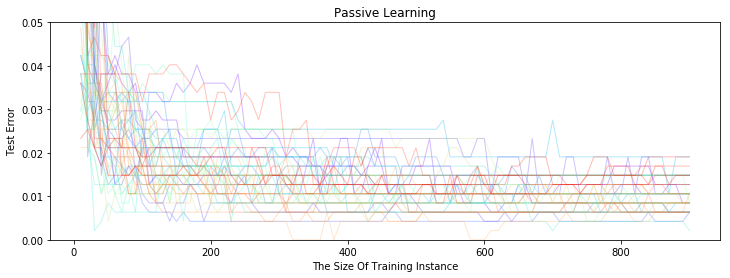

In [21]:
import random
import warnings
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings("ignore")

X_data, y_data = load_data(ROOT_PATH + SPLASH + BANK_NOTE_FILE_PATH, X_startIndex=0, 
                           X_endIndex=4, y_index=-1)
X_data = StandardScaler().fit(X_data).transform(X_data)

parameters = {"svc__C": np.linspace(1, 5, 10)}
passiveOverallErrorList = list()
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split_by_exact_number(X_data, y_data, 
                                                                        test_size=472,
                                                                        random_state=i)
    indexListLength = len(X_train)
    indexList = np.arange(0, indexListLength)
    X_train_pool = np.array([[]])
    y_train_pool = np.array([])
    tempErrorList = list()
    for __ in range(90):
        indexes = random.sample(indexList.tolist(), 10)
        while not check_y_data(y_train[indexes]):
            indexes = random.sample(indexList.tolist(), 10)
        indexList = np.setdiff1d(indexList, np.array(indexes))
        X_train_pool = np.append(X_train_pool, X_train[indexes]).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, y_train[indexes]).reshape(-1, )
        ls_scv = linearStdSVC()
        cv = 10 if len(y_train_pool) > 10 else 5
        gridCV = GridSearchCV(ls_scv, parameters, cv=cv, n_jobs=-1, scoring='accuracy')
        gridCV.fit(X_train_pool, y_train_pool)
        tempErrorList.append(1 - gridCV.score(X_test, y_test))

    passiveOverallErrorList.append(tempErrorList)

plot_mult_sets(np.arange(10, 901, 10).tolist(), 
               passiveOverallErrorList, title="Passive Learning")

#### ii. Train a SVM with a pool of 10 randomly selected data points from the training set3 using linear kernel and L1 penalty. Select the parameters of the SVM with 10-fold cross validation. Choose the 10 closest data points in the training set to the hyperplane of the SVM4 and add them to the pool. Do not replace the samples back into the training set. Train a new SVM using the pool. Repeat this process until all training data is used. You will have 90 SVMs that were trained using 10, 20, 30,..., 900 data points and their 90 test errors. You have implemented active learning.

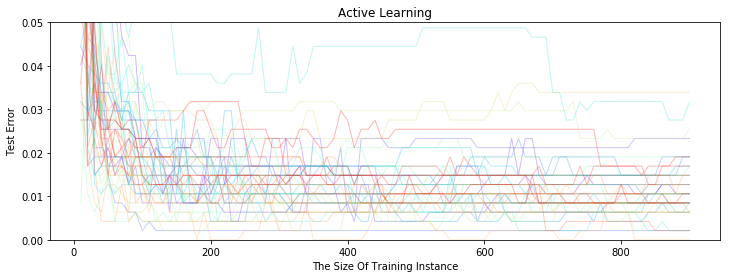

In [23]:
X_data, y_data = load_data(ROOT_PATH + SPLASH + BANK_NOTE_FILE_PATH, X_startIndex=0, 
                           X_endIndex=4, y_index=-1)

X_data = StandardScaler().fit(X_data).transform(X_data)


parameters = {"svc__C": np.linspace(1, 5, 10)}
activeOverallErrorList = list()
for i in range(50):
    X_train, X_test, y_train, y_test = train_test_split_by_exact_number(X_data, y_data, 
                                                                        test_size=472,
                                                                        random_state=i)
    indexListLength = len(X_train)
    indexList = np.arange(0, indexListLength)
    X_train_pool = np.array([[]])
    y_train_pool = np.array([])
    tempErrorList = list()

    ##If all selected data points are from one class, select another set of 10 data points randomly
    indexes = random.sample(indexList.tolist(), 10)
    while not check_y_data(y_train[indexes]):
        indexes = random.sample(indexList.tolist(), 10)
    indexList = np.setdiff1d(indexList, np.array(indexes))

    X_train_pool = np.append(X_train_pool, X_train[indexes]).reshape(-1, 4)
    y_train_pool = np.append(y_train_pool, y_train[indexes]).reshape(-1, )
    y_train_pool = y_train_pool.astype('int32')
    
    ls_scv = linearStdSVC()
    gridCV = GridSearchCV(ls_scv, parameters, cv=5, n_jobs=-1, scoring='accuracy')
    gridCV.fit(X_train_pool, y_train_pool)
    tempErrorList.append(1 - gridCV.score(X_test, y_test))

    for __ in range(89):
        remainingData = X_train[indexList]
        distances = gridCV.best_estimator_.decision_function(remainingData).reshape(-1, 1)
        remainingData = np.hstack((remainingData, abs(distances)))
        closetIndexes = remainingData[:, 4].argsort()[:10]
        firstCloset10XPoints = X_train[closetIndexes]
        firstCloset10YPoints = y_train[closetIndexes]
        indexList = np.setdiff1d(indexList, np.array(closetIndexes))
        X_train_pool = np.append(X_train_pool, firstCloset10XPoints).reshape(-1, 4)
        y_train_pool = np.append(y_train_pool, firstCloset10YPoints).reshape(-1, )

        ls_scv = linearStdSVC()
        gridCV = GridSearchCV(ls_scv, parameters, cv=10, n_jobs=-1, scoring='accuracy')
        gridCV.fit(X_train_pool, y_train_pool)
        tempErrorList.append(1 - gridCV.score(X_test, y_test))

    activeOverallErrorList.append(tempErrorList)

plot_mult_sets(np.arange(10, 901, 10).tolist(), 
               activeOverallErrorList, title="Active Learning")

### (c) Average the 50 test errors for each of the incrementally trained 90 SVMs in 2(b)i and 2(b)ii. By doing so, you are performing a Monte Carlo simulation. Plot average test error versus number of training instances for both active and passive learners on the same figure and report your conclusions. Here, you are actually obtaining a learning curve by Monte-Carlo simulation.

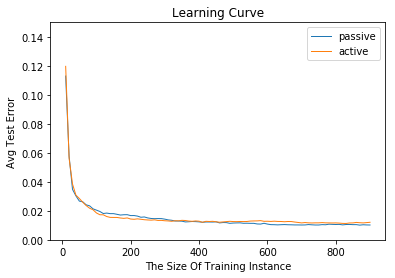

In [24]:
avgPassiveErrorList = np.average(np.array(passiveOverallErrorList), axis=0)
avgActiveErrorList = np.average(np.array(activeOverallErrorList), axis=0)
plt.plot(np.arange(10, 901, 10), avgPassiveErrorList, marker='', linewidth=1, label="passive")
plt.plot(np.arange(10, 901, 10), avgActiveErrorList, marker='', linewidth=1, label="active")
plt.xlabel('The Size Of Training Instance')
plt.ylabel('Avg Test Error')
plt.ylim([0, 0.15])
plt.title("Learning Curve")
plt.legend()
plt.show()

 - Answers: In this issue,  both passive and active learning methods, the average test error drops rapidly from the beginning and become level off at some point as the number of training instances increases. And also the slope of active learning is smoother than passive learning. Before I plot this figure, I expected that active learning has a lower test error since we named the algorithm is an "active" learner, it should and need to provide us a lower test error. But actually the truth is the passive learning is better in this issue. I also read some articles about this issue to explain this. From Article "Efficient Active Learning" (http://www.cs.cornell.edu/~nk/pubs/exp2al.pdf), the authors think the active learning would have a measurable improvement (a lower test error) over the passive learner when we work on a multi-class problem. But in the binary classification issue, they make not much difference.